In [41]:
import numpy as np 
import pandas as pd 

### 📥 Importing the dataset using pandas into variable df

In [ ]:
df=pd.read_csv("mental_health_data.csv")

In [43]:
df.head()

,id,Name,Gender,Age,City,Working Professional or Student,Profession,Academic Pressure,Work Pressure,CGPA,Study Satisfaction,Job Satisfaction,Sleep Duration,Dietary Habits,Degree,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness,Depression
0,0,Aaradhya,Female,49.0,Ludhiana,Working Professional,Chef,NaN,5.0,NaN,NaN,2.0,More than 8 hours,Healthy,BHM,No,1.0,2.0,No,0
1,1,Vivan,Male,26.0,Varanasi,Working Professional,Teacher,NaN,4.0,NaN,NaN,3.0,Less than 5 hours,Unhealthy,LLB,Yes,7.0,3.0,No,1
2,2,Yuvraj,Male,33.0,Visakhapatnam,Student,NaN,5.0,NaN,8.97,2.0,NaN,5-6 hours,Healthy,B.Pharm,Yes,3.0,1.0,No,1
3,3,Yuvraj,Male,22.0,Mumbai,Working Professional,Teacher,NaN,5.0,NaN,NaN,1.0,Less than 5 hours,Moderate,BBA,Yes,10.0,1.0,Yes,1
4,4,Rhea,Female,30.0,Kanpur,Working Professional,Business Analyst,NaN,1.0,NaN,NaN,1.0,5-6 hours,Unhealthy,BBA,Yes,9.0,4.0,Yes,0


In [44]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 140700 entries, 0 to 140699
Data columns (total 20 columns):
 #   Column                                 Non-Null Count   Dtype  
---  ------                                 --------------   -----  
 0   id                                     140700 non-null  int64  
 1   Name                                   140700 non-null  object 
 2   Gender                                 140700 non-null  object 
 3   Age                                    140700 non-null  float64
 4   City                                   140700 non-null  object 
 5   Working Professional or Student        140700 non-null  object 
 6   Profession                             104070 non-null  object 
 7   Academic Pressure                      27897 non-null   float64
 8   Work Pressure                          112782 non-null  float64
 9   CGPA                                   27898 non-null   float64
 10  Study Satisfaction                     27897 non-null   

### 🧠 The Mental Health Analysis  dataset contains 140,700 entries and 20 features  
### 🎯 Target Variable: **Depression** (Binary: 0 = No, 1 = Yes)


In [45]:
import seaborn as sns
import matplotlib.pyplot as plt
# For better visuals
sns.set(style='whitegrid')

## 📊 Visualizing the distribution of categorical features to understand class imbalances 


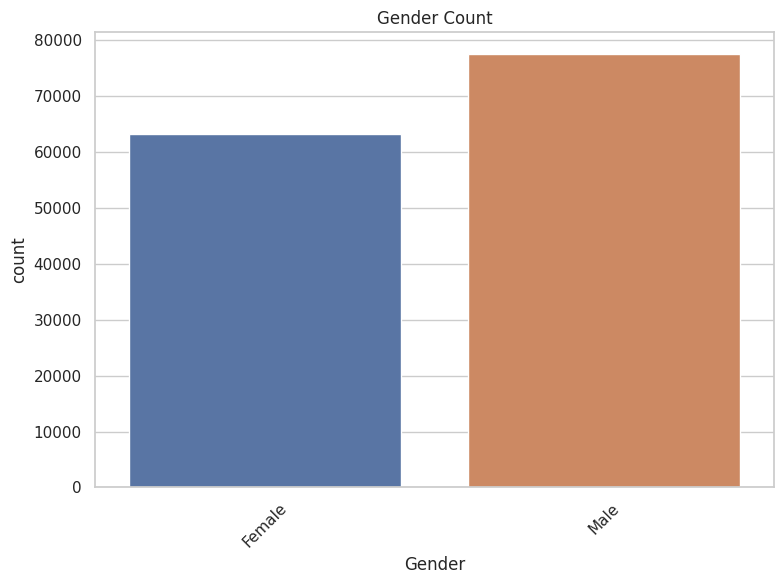

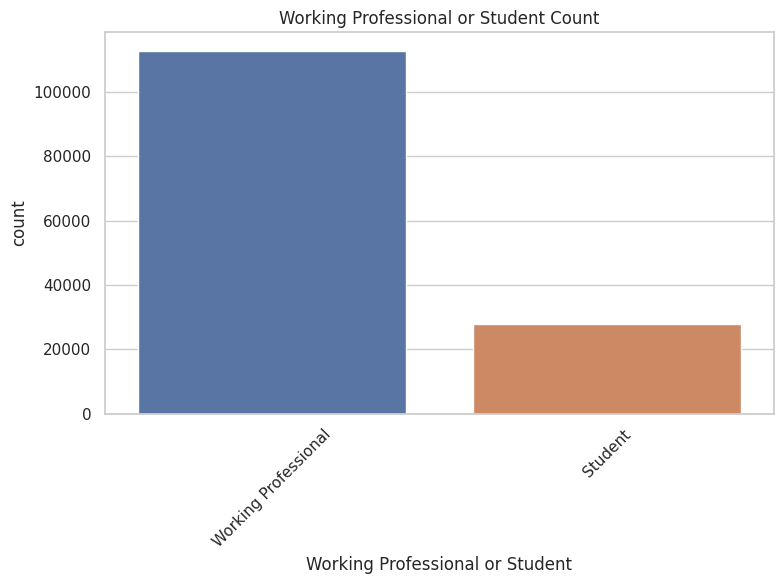

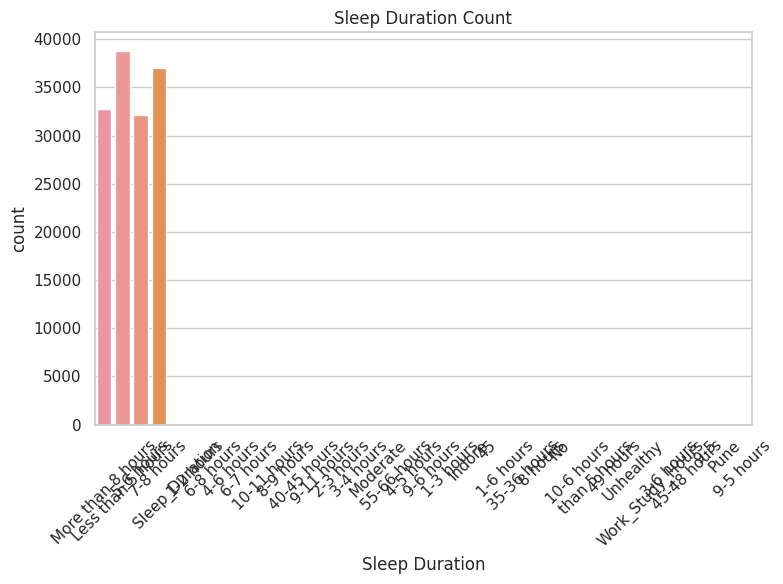

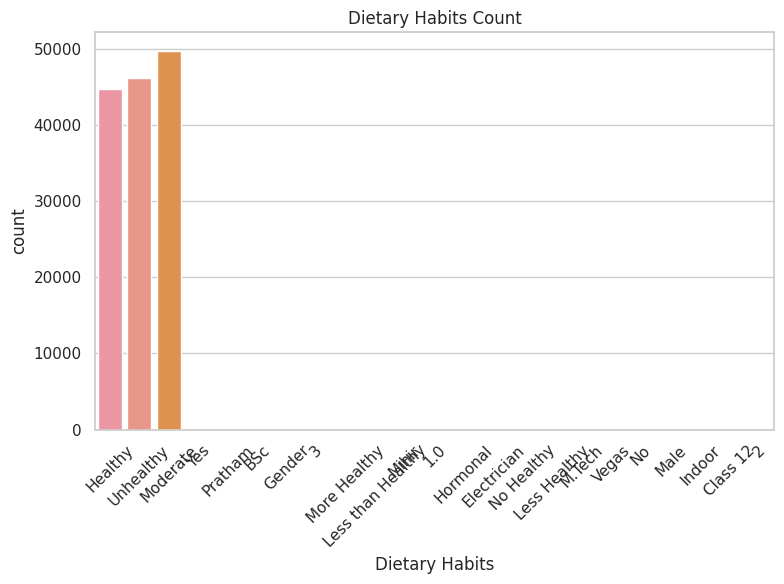

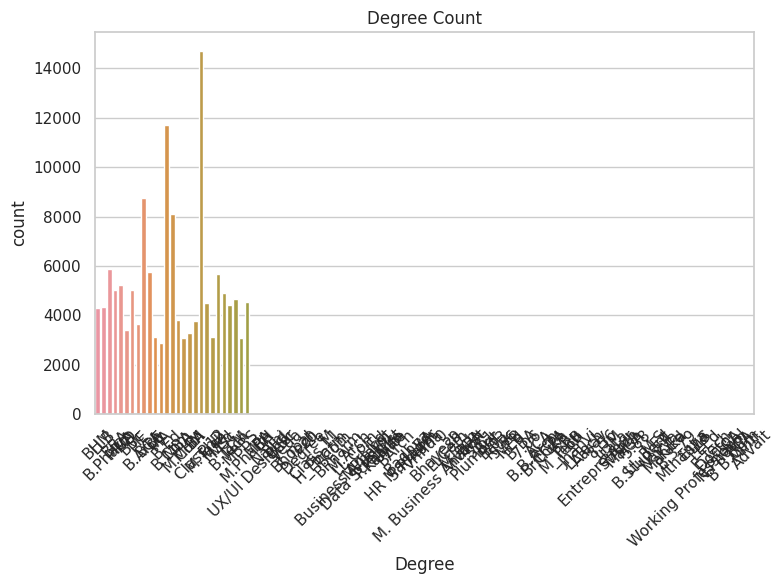

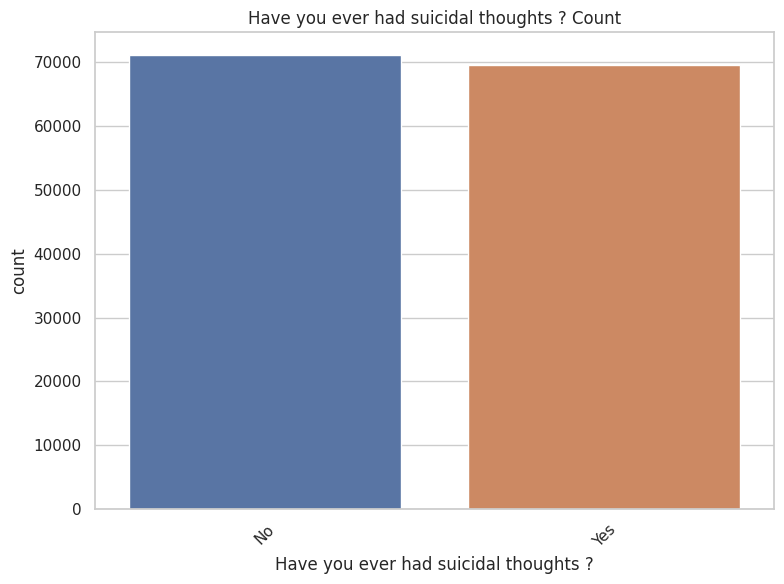

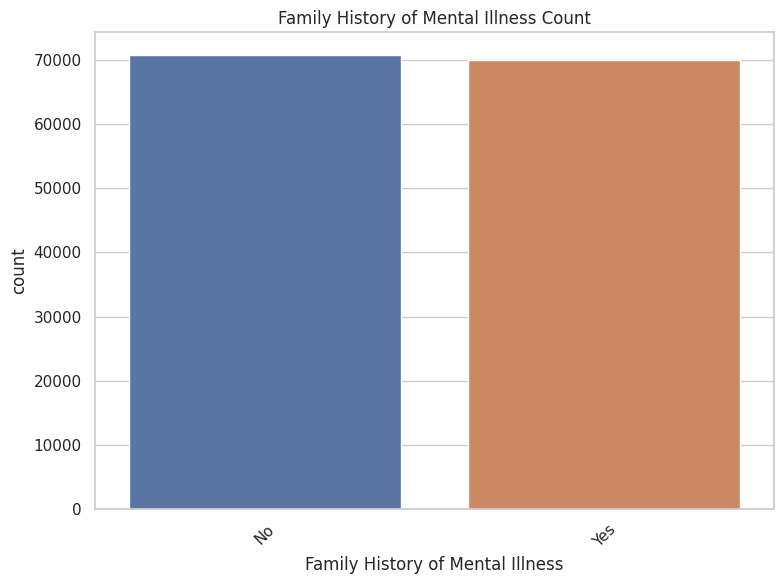

In [46]:
categorical_cols = [
    'Gender', 'Working Professional or Student', 'Sleep Duration',
    'Dietary Habits', 'Degree', 'Have you ever had suicidal thoughts ?',
    'Family History of Mental Illness'
]

for col in categorical_cols:
    plt.figure(figsize=(8, 6))
    sns.countplot(x=col, data=df)
    plt.title(f'{col} Count')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()


#
### 📊 Visualizing the distribution of the target variable: **Depression** (0 = No, 1 = Yes)


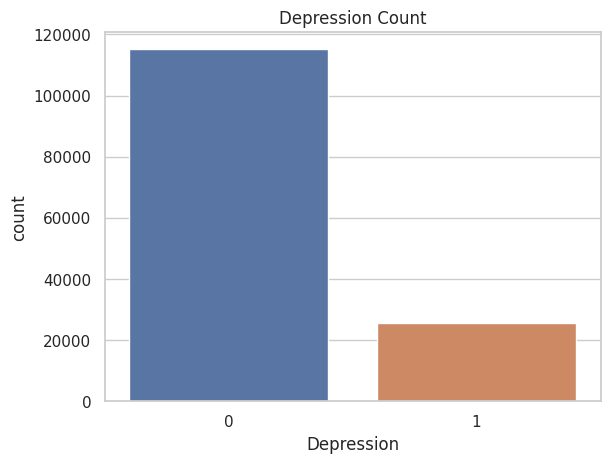

In [47]:
sns.countplot(x='Depression', data=df)
plt.title('Depression Count')
plt.show()

#
## 📊 Visualizing the distribution of Numerical features to understand class imbalances 


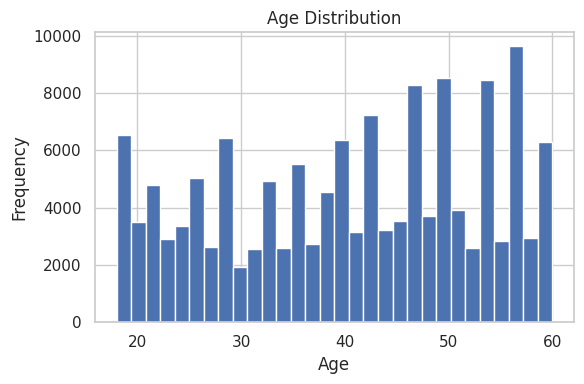

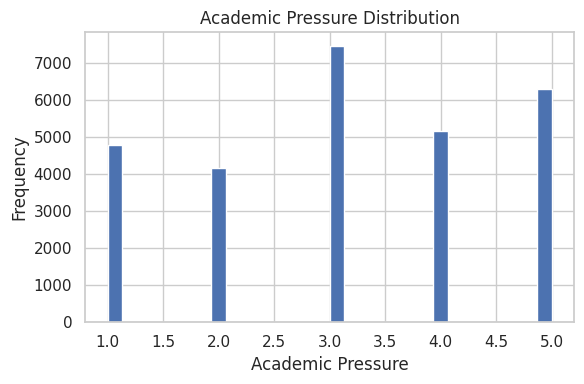

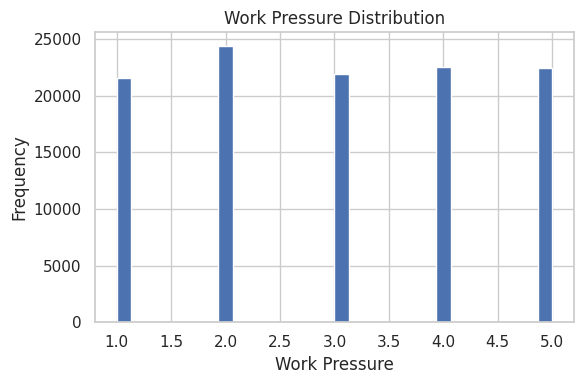

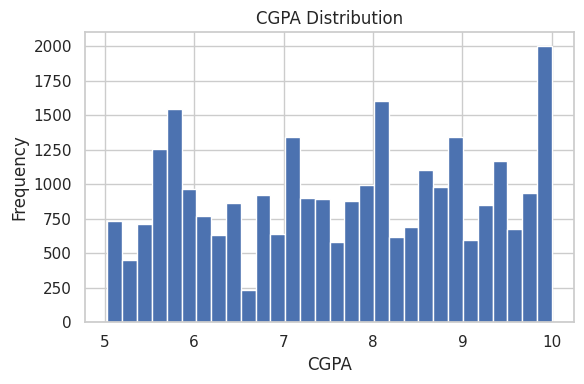

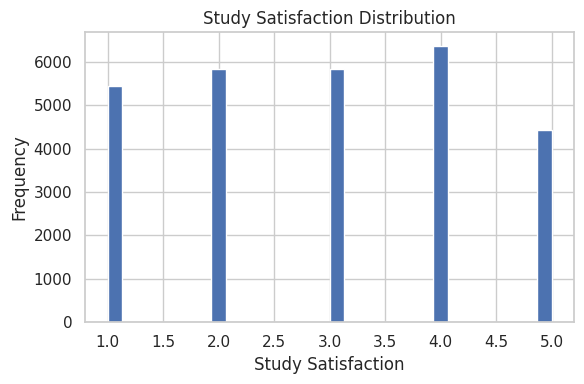

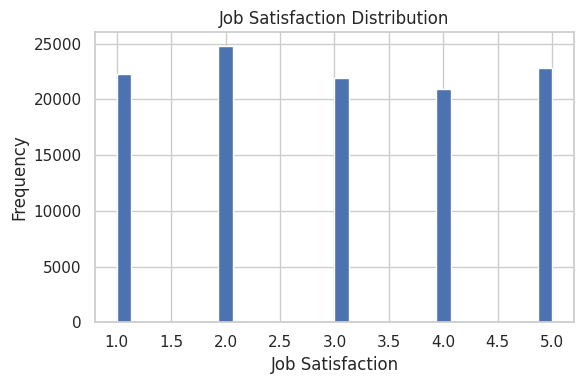

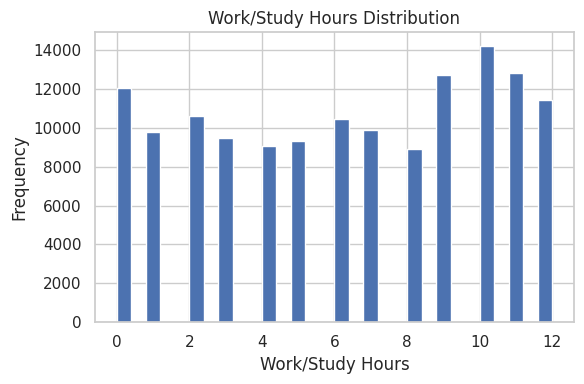

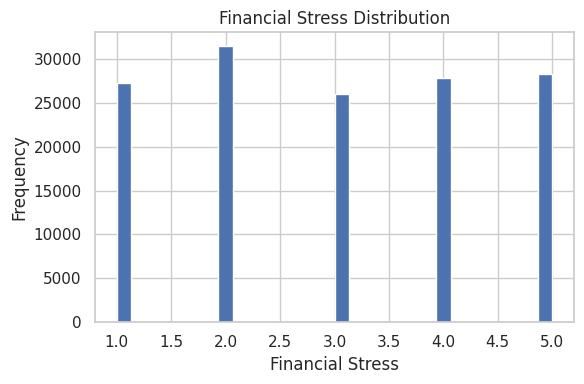

In [48]:
numerical_cols = [
    'Age', 'Academic Pressure', 'Work Pressure', 'CGPA',
    'Study Satisfaction', 'Job Satisfaction', 'Work/Study Hours',
    'Financial Stress'
]

for col in numerical_cols:
    plt.figure(figsize=(6, 4))
    df[col].hist(bins=30)
    plt.title(f'{col} Distribution')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.tight_layout()
    plt.show()


#
## Extracting unique values for categorical features and calculating min, max, and mean for numerical features to understand data distribution


In [49]:
# Get categorical feature values
categorical_features = df.select_dtypes(include=['object']).columns.tolist()
categorical_values = {feature: df[feature].unique().tolist() for feature in categorical_features}

# Get numerical feature values (showing min, max, mean for readability)
numerical_features = df.select_dtypes(include=['int64', 'float64']).columns.tolist()
numerical_values = {feature: {'min': df[feature].min(), 'max': df[feature].max(), 'mean': df[feature].mean()} for feature in numerical_features}

# Combine results
feature_values = {**categorical_values, **numerical_values}

# Print all feature values

for feature, values in categorical_values.items():
    print(f"{feature}: {values}\n")

for feature, values in numerical_values.items():
    print(f"{feature}: {values}\n")


Name: ['Aaradhya', 'Vivan', 'Yuvraj', 'Rhea', 'Vani', 'Ritvik', 'Rajveer', 'Aishwarya', 'Simran', 'Utkarsh', 'Aahana', 'Tejas', 'Aadhya', 'Kiran', 'Aditi', 'Suhani', 'Jiya', 'Bhavesh', 'Armaan', 'Ishaani', 'Prachi', 'Pratyush', 'Abhinav', 'Siddhesh', 'Aditya', 'Aarav', 'Asha', 'Kashish', 'Prisha', 'Chhavi', 'Tanmay', 'Vihaan', 'Shiv', 'Anvi', 'Darsh', 'Samar', 'Raunak', 'Mahi', 'Shaurya', 'Vidya', 'Jai', 'Ayush', 'Ansh', 'Anand', 'Yashvi', 'Shrey', 'Ritika', 'Mihir', 'Isha', 'Arjun', 'Rohan', 'Pratham', 'Nirvaan', 'Ishaan', 'Aarya', 'Riya', 'Aariv', 'Raghavendra', 'Mahika', 'Abhishek', 'Harshil', 'Janvi', 'Kartikeya', 'Shivam', 'Advait', 'Reyansh', 'Saanvi', 'Ivaan', 'Pallavi', 'Sneha', 'Ayaan', 'Aakash', 'Raghav', 'Satyam', 'Aarush', 'Vibha', 'Rupal', 'Sanya', 'Mira', 'Rashi', 'Shlok', 'Harsha', 'Divya', 'Pranav', 'Hrithik', 'Tushar', 'Garima', 'Zoya', 'Kian', 'Navya', 'Lakshay', 'Kriti', 'Palak', 'Aryan', 'Parth', 'Ishan', 'Rupak', 'Atharv', 'Aarti', 'Anirudh', 'Kabir', 'Sanjeev', 'S

### 1.  Let us remove the 'Name' and 'id' attributes as they do not help in predicting depression.They are just  identifiers and has no real impact on the analysis.

In [50]:
df.drop(['Name'], axis=1, inplace=True)
df.drop(['id'], axis=1, inplace=True)
print("Removed the columns Name and id")

Removed the columns Name and id


### 2.1  🌍 Counting the unique number of cities and displaying the frequency of each city in the dataset


In [51]:
print("Unique number of Cities:",df['City'].nunique())
city_counts = df['City'].value_counts()
# print(city_counts)

pd.set_option('display.max_rows', None)  # Show all rows
print(city_counts)


Unique number of Cities: 98
City
Kalyan                6591
Patna                 5924
Vasai-Virar           5765
Kolkata               5689
Ahmedabad             5613
Meerut                5528
Ludhiana              5226
Pune                  5210
Rajkot                5207
Visakhapatnam         5176
Srinagar              5074
Mumbai                4966
Indore                4872
Agra                  4684
Surat                 4636
Varanasi              4606
Vadodara              4568
Hyderabad             4496
Kanpur                4398
Jaipur                4328
Thane                 4289
Lucknow               4280
Nagpur                4209
Bangalore             4123
Chennai               4044
Ghaziabad             3620
Delhi                 3593
Bhopal                3475
Faridabad             3268
Nashik                3144
Mihir                    7
Nandini                  4
Mahi                     3
Vidya                    3
City                     3
Pratyush              

### 2.2 🔄 Mapping and correcting city names with potential spelling errors, then filtering out cities with fewer than 10 records for better data quality


In [52]:
# Original number of records before filtering
original_count = len(df)

# Replace incorrect city names with correct ones
City_mapping = {
    "Molkata": "Kolkata",
    "Tolkata": "Kolkata",
    "Malyansh": "Kalyan",
    "Nalyan": "Kalyan",
    "Less than 5 Kalyan": "Kalyan",
    "Khaziabad": "Ghaziabad",
    "Less Delhi": "Delhi",
    "Galesabad": "Ghaziabad",
    "Ishanabad": "Faridabad",
    "Plata": "Patna",
    "Morena": "Meerut",
    "Unirar": "Udaipur",
}

df['City'] = df['City'].replace(City_mapping)

# Filter out cities with less than 10 records
df = df[df['City'].map(df['City'].value_counts()) >= 10]

# New count after filtering
filtered_count = len(df)

# Removed records count
removed_count = original_count - filtered_count

print("Removed records count:", removed_count)

# Final output
print("Unique number of Cities:", df['City'].nunique())

corrected_city_counts = df['City'].value_counts()
pd.set_option('display.max_rows', None)
print(corrected_city_counts)


Removed records count: 86
Unique number of Cities: 30
City
Kalyan           6594
Patna            5925
Vasai-Virar      5765
Kolkata          5692
Ahmedabad        5613
Meerut           5529
Ludhiana         5226
Pune             5210
Rajkot           5207
Visakhapatnam    5176
Srinagar         5074
Mumbai           4966
Indore           4872
Agra             4684
Surat            4636
Varanasi         4606
Vadodara         4568
Hyderabad        4496
Kanpur           4398
Jaipur           4328
Thane            4289
Lucknow          4280
Nagpur           4209
Bangalore        4123
Chennai          4044
Ghaziabad        3622
Delhi            3594
Bhopal           3475
Faridabad        3269
Nashik           3144
Name: count, dtype: int64



### 3.1 💼 Counting the unique number of professions and displaying the frequency of each profession in the dataset


In [53]:
print("Unique number of Professions:",df['Profession'].nunique())
city_counts = df['Profession'].value_counts()
print(city_counts)


Unique number of Professions: 64
Profession
Teacher                   24896
Content Writer             7813
Architect                  4365
Consultant                 4228
HR Manager                 4016
Pharmacist                 3888
Doctor                     3255
Business Analyst           3159
Chemist                    2964
Entrepreneur               2964
Chef                       2862
Educational Consultant     2851
Data Scientist             2389
Researcher                 2325
Lawyer                     2211
Customer Support           2054
Marketing Manager          1975
Pilot                      1912
Travel Consultant          1859
Plumber                    1746
Sales Executive            1737
Manager                    1735
Judge                      1712
Electrician                1581
Financial Analyst          1573
Software Engineer          1509
Civil Engineer             1467
UX/UI Designer             1452
Digital Marketer           1371
Accountant                 1

### 3.2 🔄 Mapping and correcting profession names with potential spelling errors, then filtering out professions with fewer than 10 records for improved data consistency


In [54]:
# Original number of records before profession filtering
original_profession_count = len(df)

# Replace incorrect profession names with correct ones
Profession_mapping = {
    "Finanancial Analyst": "Financial Analyst",
    "Medical Doctor": "Doctor",
    "City Manager": "Manager",
    "Family Consultant": "Consultant"
}

df['Profession'] = df['Profession'].replace(Profession_mapping)

df['Profession'] = df['Profession'].fillna("Other") #Filling null values with Other

# Filter out professions with less than 10 records
df = df[df['Profession'].map(df['Profession'].value_counts()) >= 10]

# New count after filtering
filtered_profession_count = len(df)

# Removed records count for professions
removed_profession_count = original_profession_count - filtered_profession_count

print("Removed profession records count:", removed_profession_count)

# Final output for professions
print("Unique number of Professions:", df['Profession'].nunique())

corrected_profession_counts = df['Profession'].value_counts()
pd.set_option('display.max_rows', None)
print(corrected_profession_counts)


Removed profession records count: 47
Unique number of Professions: 35
Profession
Other                     36606
Teacher                   24896
Content Writer             7813
Architect                  4365
Consultant                 4229
HR Manager                 4016
Pharmacist                 3888
Doctor                     3256
Business Analyst           3159
Entrepreneur               2964
Chemist                    2964
Financial Analyst          2900
Chef                       2862
Educational Consultant     2851
Data Scientist             2389
Researcher                 2325
Lawyer                     2211
Customer Support           2054
Marketing Manager          1975
Pilot                      1912
Travel Consultant          1859
Plumber                    1746
Sales Executive            1737
Manager                    1736
Judge                      1712
Electrician                1581
Software Engineer          1509
Civil Engineer             1467
UX/UI Designer         

### 4.1 🛌 Counting the unique number of sleep duration categories and displaying the frequency of each in the dataset


In [55]:
print("Unique number of Sleep Duration:",df['Sleep Duration'].nunique())
city_counts = df['Sleep Duration'].value_counts()
print(city_counts)

Unique number of Sleep Duration: 36
Sleep Duration
Less than 5 hours    38753
7-8 hours            36924
More than 8 hours    32703
5-6 hours            32108
3-4 hours               12
6-7 hours                8
4-5 hours                7
2-3 hours                5
4-6 hours                5
6-8 hours                4
1-6 hours                4
No                       4
9-11 hours               2
10-11 hours              2
Sleep_Duration           2
Unhealthy                2
45                       2
8-9 hours                2
10-6 hours               1
9-5                      1
45-48 hours              1
3-6 hours                1
Work_Study_Hours         1
49 hours                 1
than 5 hours             1
Pune                     1
9-6 hours                1
8 hours                  1
35-36 hours              1
Indore                   1
1-3 hours                1
55-66 hours              1
Moderate                 1
40-45 hours              1
1-2 hours                1
9-5 

### 4.2 🛌 Cleaning and grouping similar sleep duration values into standard categories, then filtering out rare entries with fewer than 10 records


In [56]:
def map_sleep_duration(duration):
    if duration in ['7-8 hours', 'Less than 5 hours', 'More than 8 hours', '5-6 hours']:
        return duration
    elif duration in ['3-4 hours', '4-5 hours', '1-3 hours', '2-3 hours', 'No']:
        return 'Less than 5 hours'
    elif duration in ['4-6 hours', '3-6 hours', '1-6 hours']:
        return '5-6 hours'
    elif duration in ['6-7 hours', '6-8 hours', '9-5 hours', '10-6 hours', '9-6 hours']:
        return '7-8 hours'
    elif duration in ['8-9 hours', '9-11 hours']:
        return 'More than 8 hours'
    else:
        return duration  # Leave as-is

# Apply mapping
df['Sleep Duration'] = df['Sleep Duration'].apply(map_sleep_duration)

df = df[df['Sleep Duration'].map(df['Sleep Duration'].value_counts()) >= 10]


print("Unique number of Sleep Duration:",df['Sleep Duration'].nunique())
city_counts = df['Sleep Duration'].value_counts()
print(city_counts)

Unique number of Sleep Duration: 4
Sleep Duration
Less than 5 hours    38782
7-8 hours            36939
More than 8 hours    32707
5-6 hours            32118
Name: count, dtype: int64


### 5.1 🎓 Counting the unique number of degrees and displaying the frequency of each degree in the dataset


In [57]:
print("Unique number of Degrees:", df['Degree'].nunique())
degree_counts = df['Degree'].value_counts()
print(degree_counts)


Unique number of Degrees: 113
Degree
Class 12                14721
B.Ed                    11683
B.Arch                   8736
B.Com                    8106
B.Pharm                  5851
BCA                      5730
M.Ed                     5662
MCA                      5228
BBA                      5027
BSc                      5017
MSc                      4871
LLM                      4643
M.Pharm                  4534
M.Tech                   4469
B.Tech                   4423
LLB                      4342
BHM                      4302
MBA                      3811
BA                       3743
ME                       3626
MD                       3376
MHM                      3285
PhD                      3098
BE                       3097
M.Com                    3090
MBBS                     3078
MA                       2883
M.Arch                      5
UX/UI Designer              4
M                           3
Kalyan                      3
B.Sc                        3
BPh

### 5.2 🎓 Standardizing inconsistent degree names through mapping and filtering out degrees with fewer than 10 records for cleaner analysis


In [58]:
degree_mapping = {
    'BEd': 'B.Ed',
    'MEd': 'M.Ed',
    'BPharm': 'B.Pharm',
    'M_Tech': 'M.Tech',
    'MTech': 'M.Tech',
    'LLBA': 'LLB',
    'LLS':'LLB',
    'LL B.Ed': 'B.Ed',
    'LLTech': 'LLM',
    'LLCom': 'LLM',
    'LL.Com': 'LLM',
    'BArch': 'B.Arch',
    'B.Sc': 'BSc',
    'B BA': 'BBA',
    'B B.Com': 'B.Com',
    'MPharm': 'M.Pharm',
    'P.Pharm': 'M.Pharm',
    'N.Pharm': 'M.Pharm',
    'S.Pharm': 'M.Pharm',
    'H_Pharm': 'M.Pharm',
    'M.S': 'MSc',
    'P.Com': 'M.Com',
    'L.Ed': 'B.Ed',
    'M. Business Analyst': 'MBA',
    'ACA': 'MBA',
    'HR Manager': 'MBA',
    'Business Analyst': 'MBA',
    'BB':'BA',
    'HCA':'BCA',
    'Doctor':'MBBS',
    'K.Ed':'B.Ed',
    'M.Arch':'B.Arch',
    'S.Arch':'B.Arch'
}

df['Degree'] = df['Degree'].replace(degree_mapping)


df = df[df['Degree'].map(df['Degree'].value_counts()) >= 10]


print("Unique number of Degrees:", df['Degree'].nunique())
degree_counts = df['Degree'].value_counts()
print(degree_counts)




Unique number of Degrees: 27
Degree
Class 12    14721
B.Ed        11690
B.Arch       8744
B.Com        8107
B.Pharm      5853
BCA          5731
M.Ed         5664
MCA          5228
BBA          5028
BSc          5020
MSc          4872
LLM          4646
M.Pharm      4539
M.Tech       4471
B.Tech       4423
LLB          4345
BHM          4302
MBA          3815
BA           3744
ME           3626
MD           3376
MHM          3285
PhD          3098
BE           3097
M.Com        3092
MBBS         3079
MA           2883
Name: count, dtype: int64


### 6.1 🍽️Counting unique dietary habits and displaying the frequency of each in the dataset.

In [59]:
print("Unique number of Degrees:", df['Dietary Habits'].nunique())
degree_counts = df['Dietary Habits'].value_counts()
print(degree_counts)


Unique number of Degrees: 23
Dietary Habits
Moderate             49618
Unhealthy            46149
Healthy              44685
Yes                      2
No                       2
More Healthy             2
No Healthy               1
Class 12                 1
Indoor                   1
Male                     1
Vegas                    1
M.Tech                   1
Less Healthy             1
1.0                      1
Electrician              1
Hormonal                 1
Mihir                    1
Less than Healthy        1
3                        1
Gender                   1
BSc                      1
Pratham                  1
2                        1
Name: count, dtype: int64



### 6.2 🍽️Standardizing dietary habit labels and removing rare entries

In [60]:
# Mapping for standardizing Dietary Habits
dietary_mapping = {
    'More Healthy': 'Healthy',
    'No Healthy': 'Unhealthy',
    'Less Healthy': 'Unhealthy',
    'Less than Healthy': 'Unhealthy',
    'Moderate': 'Moderate',
    'Unhealthy': 'Unhealthy',
    'Healthy': 'Healthy'
}

# Apply mapping
df['Dietary Habits'] = df['Dietary Habits'].replace(dietary_mapping)

# Filter values with at least 10 counts
df = df[df['Dietary Habits'].map(df['Dietary Habits'].value_counts()) >= 10]

# Print results
print("Unique number of Dietary Habits:", df['Dietary Habits'].nunique())
diet_counts = df['Dietary Habits'].value_counts()
print(diet_counts)


Unique number of Dietary Habits: 3
Dietary Habits
Moderate     49618
Unhealthy    46152
Healthy      44687
Name: count, dtype: int64


# **# Checking for Null values**

In [61]:
df.isnull().sum()

Gender                                        0
Age                                           0
City                                          0
Working Professional or Student               0
Profession                                    0
Academic Pressure                        112632
Work Pressure                             27846
CGPA                                     112631
Study Satisfaction                       112632
Job Satisfaction                          27838
Sleep Duration                                0
Dietary Habits                                0
Degree                                        0
Have you ever had suicidal thoughts ?         0
Work/Study Hours                              0
Financial Stress                              4
Family History of Mental Illness              0
Depression                                    0
dtype: int64

### ⚖️ Combining 'Academic Pressure' and 'Work Pressure' into a unified 'Pressure' column, assuming only one is non-null for each record, then removing the original columns


In [62]:

df['Academic/Work Pressure'] = np.where(pd.notna(df['Academic Pressure']), df['Academic Pressure'], df['Work Pressure'])
df.drop(['Academic Pressure', 'Work Pressure'], axis=1, inplace=True)


### ⚖️ Combining 'Study Satisfaction' and 'Job Satisfaction' into a unified 'Study/Job Satisfaction' column, assuming only one is non-null for each record, then removing the original columns

In [63]:

df['Study/Job Satisfaction'] = np.where(pd.notna(df['Study Satisfaction']), df['Study Satisfaction'], df['Job Satisfaction'])
df.drop(['Study Satisfaction', 'Job Satisfaction'], axis=1, inplace=True)


### filling Null values in CGPA with mean and dropping records with null values

In [64]:

df['CGPA'] = df['CGPA'].fillna(df['CGPA'].mean())

df = df.dropna()


### Rechecking for null values

In [65]:
df.isnull().sum()

Gender                                   0
Age                                      0
City                                     0
Working Professional or Student          0
Profession                               0
CGPA                                     0
Sleep Duration                           0
Dietary Habits                           0
Degree                                   0
Have you ever had suicidal thoughts ?    0
Work/Study Hours                         0
Financial Stress                         0
Family History of Mental Illness         0
Depression                               0
Academic/Work Pressure                   0
Study/Job Satisfaction                   0
dtype: int64

## 🔢 Label Encoding

In [66]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

# Fit and transform the 'Gender' column
df['Gender'] = encoder.fit_transform(df['Gender'])
df['City'] = encoder.fit_transform(df['City'])
df['Working Professional or Student'] = encoder.fit_transform(df['Working Professional or Student'])
df['Profession'] = encoder.fit_transform(df['Profession'])
df['Sleep Duration'] = encoder.fit_transform(df['Sleep Duration'])
df['Dietary Habits'] = encoder.fit_transform(df['Dietary Habits'])
df['Degree'] = encoder.fit_transform(df['Degree'])
df['Have you ever had suicidal thoughts ?'] = encoder.fit_transform(df['Have you ever had suicidal thoughts ?'])
df['Family History of Mental Illness'] = encoder.fit_transform(df['Family History of Mental Illness'])



## Correlation Matrix

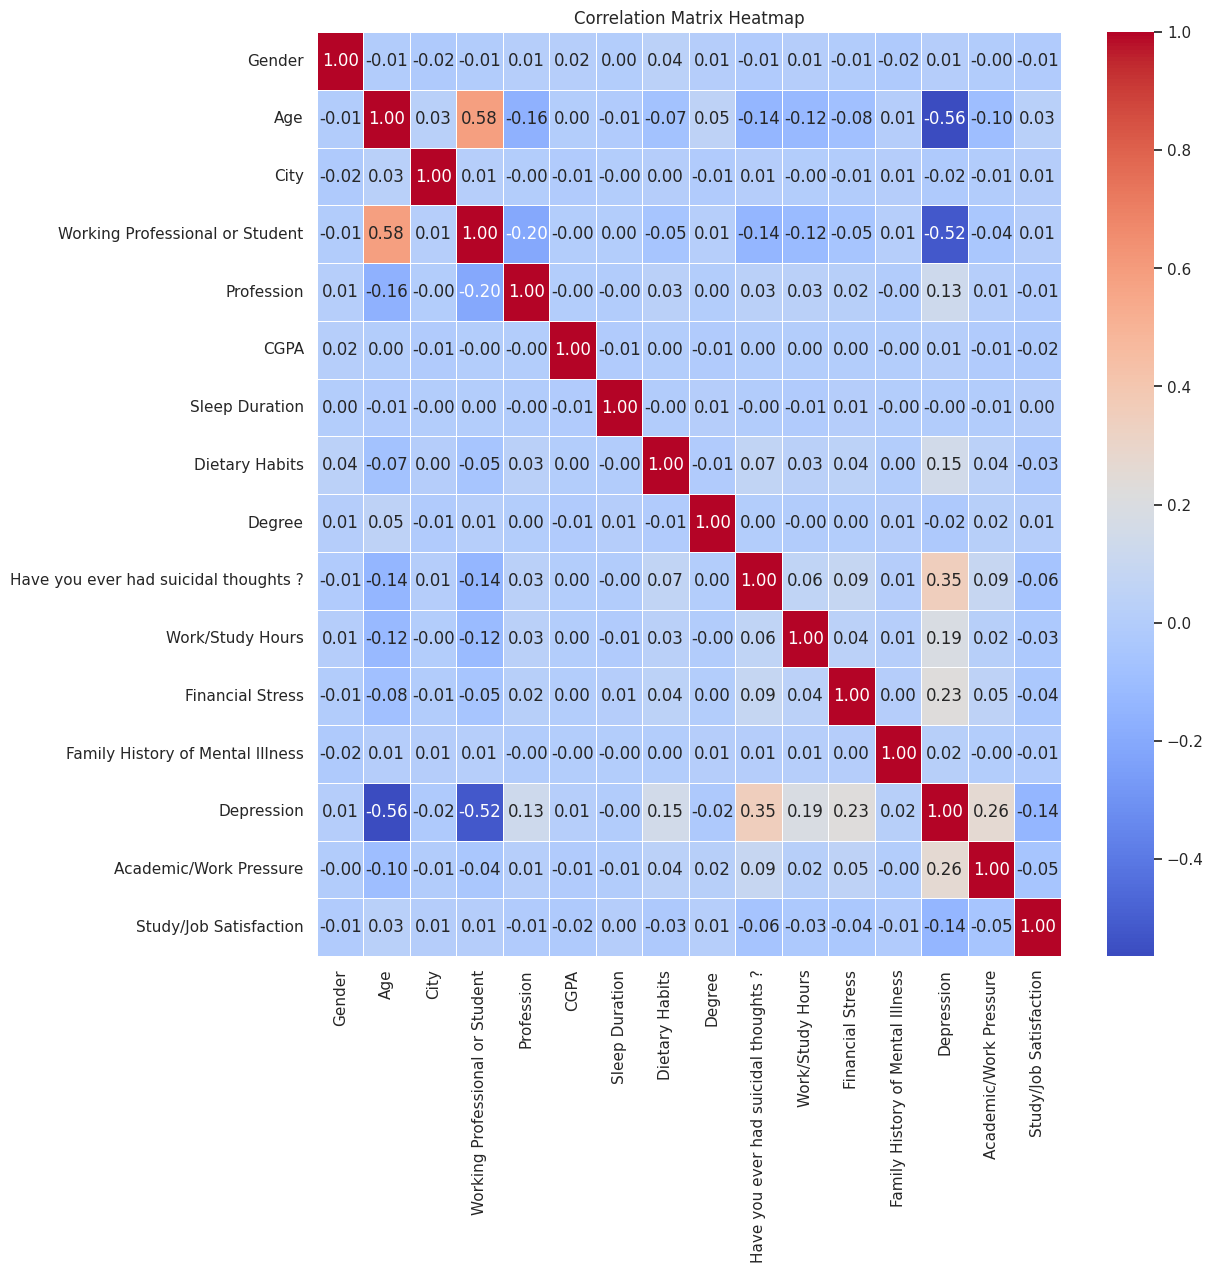

In [67]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

corr_matrix = df.corr()

plt.figure(figsize=(12, 12))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("Correlation Matrix Heatmap")
plt.show()


# Training the models using all features 

In [68]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

# Define features and target variable
X = df.drop(columns=['Depression'])
y = df['Depression']

# Split the data
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=2)

# Logistic Regression
log_reg = LogisticRegression(max_iter=1000)
log_reg.fit(X_train, y_train)
y_pred_log = log_reg.predict(X_val)
accuracy_log = accuracy_score(y_val, y_pred_log)
print("Logistic Regression Accuracy:", accuracy_log)

# Random Forest
rf = RandomForestClassifier()
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_val)
accuracy_rf = accuracy_score(y_val, y_pred_rf)
print("Random Forest Accuracy:", accuracy_rf)

# Decision Tree
dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)
y_pred_dt = dt.predict(X_val)
accuracy_dt = accuracy_score(y_val, y_pred_dt)
print("Decision Tree Accuracy:", accuracy_dt)

# Gradient Boosting
gb = GradientBoostingClassifier()
gb.fit(X_train, y_train)
y_pred_gb = gb.predict(X_val)
accuracy_gb = accuracy_score(y_val, y_pred_gb)
print("Gradient Boosting Accuracy:", accuracy_gb)


from xgboost import XGBClassifier

# XGBoost Classifier
xgb = XGBClassifier(use_label_encoder=False, eval_metric='logloss')
xgb.fit(X_train, y_train)
y_pred_xgb = xgb.predict(X_val)
accuracy_xgb = accuracy_score(y_val, y_pred_xgb)
print("XGBoost Classifier Accuracy:", accuracy_xgb)

from sklearn.naive_bayes import GaussianNB

# Naive Bayes
nb = GaussianNB()
nb.fit(X_train, y_train)
y_pred_nb = nb.predict(X_val)
accuracy_nb = accuracy_score(y_val, y_pred_nb)
print("Naive Bayes Accuracy:", accuracy_nb)

from sklearn.svm import SVC
# Support Vector Machine (SVM)
svm = SVC(kernel='rbf')  
svm.fit(X_train, y_train)
y_pred_svm = svm.predict(X_val)
accuracy_svm = accuracy_score(y_val, y_pred_svm)
print("SVM Accuracy:", accuracy_svm)



Logistic Regression Accuracy: 0.9372618835677408
Random Forest Accuracy: 0.9374755207406089
Decision Tree Accuracy: 0.9007655332027773
Gradient Boosting Accuracy: 0.937831582695389
XGBoost Classifier Accuracy: 0.9375111269360868
Naive Bayes Accuracy: 0.8874132098985223
SVM Accuracy: 0.9364073348762685


# Training the models using Selected features 

In [69]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

# Define features and target variable
X = df.drop(columns=['Depression','Gender','City','CGPA','Sleep Duration','Degree','Family History of Mental Illness','Profession'])
y = df['Depression']


# Split the data
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=2)

# Logistic Regression
log_reg = LogisticRegression(max_iter=1000)
log_reg.fit(X_train, y_train)
y_pred_log = log_reg.predict(X_val)
accuracy_log = accuracy_score(y_val, y_pred_log)
print("Logistic Regression Accuracy:", accuracy_log)

# Random Forest
rf = RandomForestClassifier()
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_val)
accuracy_rf = accuracy_score(y_val, y_pred_rf)
print("Random Forest Accuracy:", accuracy_rf)

# Decision Tree
dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)
y_pred_dt = dt.predict(X_val)
accuracy_dt = accuracy_score(y_val, y_pred_dt)
print("Decision Tree Accuracy:", accuracy_dt)

# Gradient Boosting
gb = GradientBoostingClassifier()
gb.fit(X_train, y_train)
y_pred_gb = gb.predict(X_val)
accuracy_gb = accuracy_score(y_val, y_pred_gb)
print("Gradient Boosting Accuracy:", accuracy_gb)


from xgboost import XGBClassifier

# XGBoost Classifier
xgb = XGBClassifier(use_label_encoder=False, eval_metric='logloss')
xgb.fit(X_train, y_train)
y_pred_xgb = xgb.predict(X_val)
accuracy_xgb = accuracy_score(y_val, y_pred_xgb)
print("XGBoost Classifier Accuracy:", accuracy_xgb)

from sklearn.naive_bayes import GaussianNB

# Naive Bayes
nb = GaussianNB()
nb.fit(X_train, y_train)
y_pred_nb = nb.predict(X_val)
accuracy_nb = accuracy_score(y_val, y_pred_nb)
print("Naive Bayes Accuracy:", accuracy_nb)

from sklearn.svm import SVC
# Support Vector Machine (SVM)
svm = SVC(kernel='rbf')  
svm.fit(X_train, y_train)
y_pred_svm = svm.predict(X_val)
accuracy_svm = accuracy_score(y_val, y_pred_svm)
print("SVM Accuracy:", accuracy_svm)



Logistic Regression Accuracy: 0.9371194587858287
Random Forest Accuracy: 0.9304611002314402
Decision Tree Accuracy: 0.9036852412319744
Gradient Boosting Accuracy: 0.9384724942139933
XGBoost Classifier Accuracy: 0.9379740074773011
Naive Bayes Accuracy: 0.913370126401994
SVM Accuracy: 0.9370482463948727


## Saving Gradient Boosting model

In [70]:
import pickle
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score
X = df.drop(columns=['Depression','Gender','City','CGPA','Sleep Duration','Degree','Family History of Mental Illness','Profession'])
y = df['Depression']

# Split the data
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=2)

# Train the model
gb = GradientBoostingClassifier()
gb.fit(X_train, y_train)

# Predict and check accuracy 
y_pred_gb = gb.predict(X_val)
accuracy_gb = accuracy_score(y_val, y_pred_gb)
print("Gradient Boosting Accuracy:", accuracy_gb)

# Save the model to a .pkl file
with open('model.pkl', 'wb') as file:
    pickle.dump(gb, file)


Gradient Boosting Accuracy: 0.9384724942139933


# The model input should be in the below order

In [71]:
print(X_train.columns.tolist())


['Age', 'Working Professional or Student', 'Dietary Habits', 'Have you ever had suicidal thoughts ?', 'Work/Study Hours', 'Financial Stress', 'Academic/Work Pressure', 'Study/Job Satisfaction']
